In [2]:
%matplotlib inline
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


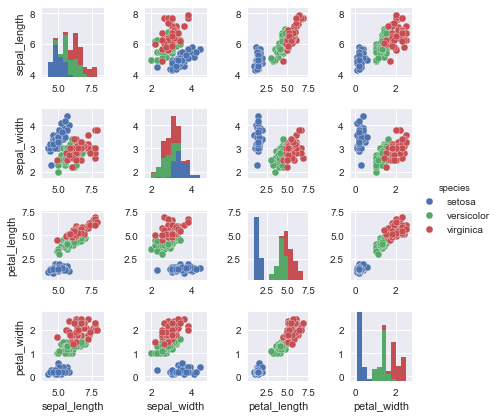

In [3]:
sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

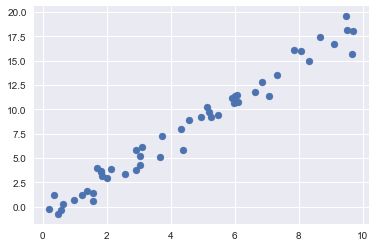

In [7]:
import matplotlib.pyplot as plt 
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x, y);

In [8]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(fit_intercept=True)

In [19]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [20]:
model.fit(X, y);

In [21]:
model.coef_, model.intercept_

(array([ 1.9776566]), -0.90331072553111635)

In [22]:
xfit = np.linspace(-1, 11)

In [23]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

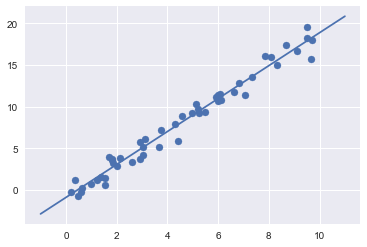

In [24]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [26]:
from sklearn.cross_validation import train_test_split;
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

In [30]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

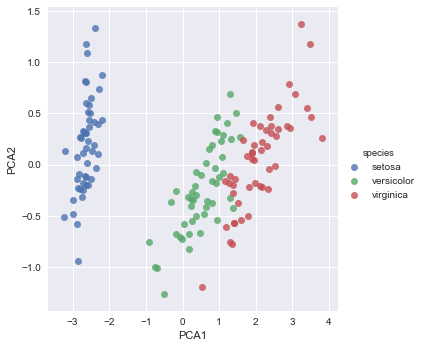

In [32]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [35]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris) 
y_gmm = model.predict(X_iris)

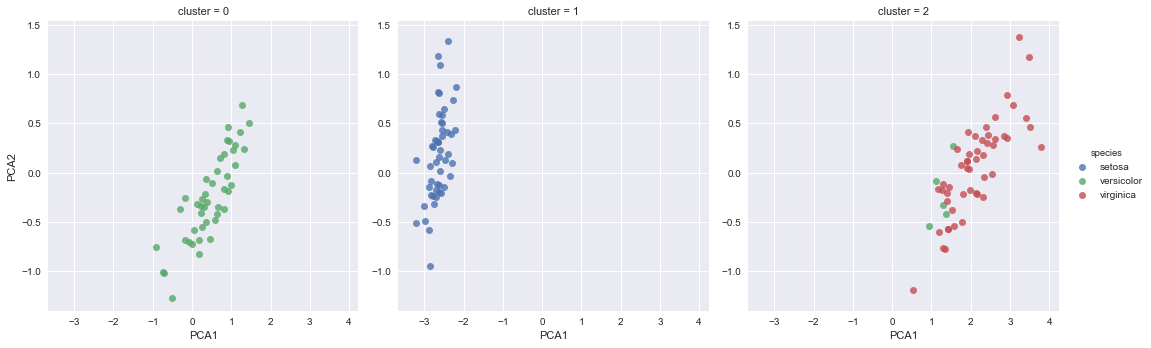

In [36]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);